### **HomeWork2**

**Homework Assignment: Terrorism Incident Analysis**

                            By: Kaushik Budur
                            MyMav ID: 1002224112

**Objective**

This homework assignment covers the key aspects of the analysis we discussed, including geospatial visualization, attack type analysis, and time series decomposition. It provides a structured approach for students to apply their Python skills to real-world data analysis in the context of terrorism incident data.


**Dataset**

Use the provided terrorism incident dataset with the following key variables:

eventid, iyear, imonth, iday, country_txt, region_txt, city, latitude, longitude, attacktype1_txt, nkill, nwound

Tasks

**Data Preparation (20 points)**

a) Load the dataset using pandas.
    
    Loading dataset and only selecting the required eventid, iyear, imonth, iday, country_txt, region_txt, city, latitude, longitude, attacktype1_txt, nkill, nwound columns
b) Clean the data by removing rows with missing latitude or longitude.

In [2]:
!pip install geodatasets

from google.colab import files
import pandas as pd
import pandas as pd

import geopandas as gpd

import folium

from folium.plugins import HeatMap

import matplotlib.pyplot as plt

from statsmodels.tsa.seasonal import seasonal_decompose

from geodatasets import get_path


# Or if datset is in some predefined directory
# df = pd.read_csv('/content/region_01.csv')

uploaded = files.upload()


# Assuming your uploaded file is named 'your_file.csv'
df = pd.read_csv('region_01.csv')


# List of columns you want to select
columns_to_select = ['eventid', 'iyear', 'imonth', 'iday', 'country_txt', 'region_txt',
                     'city', 'latitude', 'longitude', 'attacktype1_txt', 'nkill', 'nwound']

# Select only the specified columns
df_selected = df[columns_to_select]

# Display the resulting DataFrame
print(df_selected)



Saving region_01.csv to region_01.csv
           eventid  iyear  imonth  iday    country_txt     region_txt  \
0     197000000002   1970       0     0         Mexico  North America   
1     197001010002   1970       1     1  United States  North America   
2     197001020002   1970       1     2  United States  North America   
3     197001020003   1970       1     2  United States  North America   
4     197001030001   1970       1     3  United States  North America   
...            ...    ...     ...   ...            ...            ...   
3842  202012130030   2020      12    13  United States  North America   
3843  202012130044   2020      12    13  United States  North America   
3844  202012150028   2020      12    15  United States  North America   
3845  202012250003   2020      12    25  United States  North America   
3846  202012280022   2020      12    28  United States  North America   

               city   latitude   longitude                 attacktype1_txt  \
0      

In [3]:

# Display the first few rows of the DataFrame
df_selected.head()


eventid  iyear  imonth  iday    country_txt     region_txt  \
0  197000000002   1970       0     0         Mexico  North America   
1  197001010002   1970       1     1  United States  North America   
2  197001020002   1970       1     2  United States  North America   
3  197001020003   1970       1     2  United States  North America   
4  197001030001   1970       1     3  United States  North America   

          city   latitude   longitude                 attacktype1_txt  nkill  \
0  Mexico city  19.371887  -99.086624     Hostage Taking (Kidnapping)    0.0   
1        Cairo  37.005105  -89.176269                   Armed Assault    0.0   
2      Oakland  37.791927 -122.225906               Bombing/Explosion    0.0   
3      Madison  43.076592  -89.412488  Facility/Infrastructure Attack    0.0   
4      Madison  43.072950  -89.386694  Facility/Infrastructure Attack    0.0   

   nwound  
0     0.0  
1     0.0  
2     0.0  
3     0.0  
4     0.0

In [4]:
# Drop rows with missing latitude or longitude
df_cleaned = df_selected.dropna(subset=['latitude', 'longitude'])

# Display the first few rows of the cleaned DataFrame
df_cleaned.head()


eventid  iyear  imonth  iday    country_txt     region_txt  \
0  197000000002   1970       0     0         Mexico  North America   
1  197001010002   1970       1     1  United States  North America   
2  197001020002   1970       1     2  United States  North America   
3  197001020003   1970       1     2  United States  North America   
4  197001030001   1970       1     3  United States  North America   

          city   latitude   longitude                 attacktype1_txt  nkill  \
0  Mexico city  19.371887  -99.086624     Hostage Taking (Kidnapping)    0.0   
1        Cairo  37.005105  -89.176269                   Armed Assault    0.0   
2      Oakland  37.791927 -122.225906               Bombing/Explosion    0.0   
3      Madison  43.076592  -89.412488  Facility/Infrastructure Attack    0.0   
4      Madison  43.072950  -89.386694  Facility/Infrastructure Attack    0.0   

   nwound  
0     0.0  
1     0.0  
2     0.0  
3     0.0  
4     0.0

c) Create a GeoDataFrame using GeoPandas.

In [5]:
from shapely.geometry import Point

# Create geometry from latitude and longitude columns
geometry = [Point(lon, lat) for lon, lat in zip(df_cleaned['longitude'], df_cleaned['latitude'])]

# Create the GeoDataFrame
gdf = gpd.GeoDataFrame(df_cleaned, geometry=geometry)

# Display the first few rows of the GeoDataFrame
gdf.head()


eventid  iyear  imonth  iday    country_txt     region_txt  \
0  197000000002   1970       0     0         Mexico  North America   
1  197001010002   1970       1     1  United States  North America   
2  197001020002   1970       1     2  United States  North America   
3  197001020003   1970       1     2  United States  North America   
4  197001030001   1970       1     3  United States  North America   

          city   latitude   longitude                 attacktype1_txt  nkill  \
0  Mexico city  19.371887  -99.086624     Hostage Taking (Kidnapping)    0.0   
1        Cairo  37.005105  -89.176269                   Armed Assault    0.0   
2      Oakland  37.791927 -122.225906               Bombing/Explosion    0.0   
3      Madison  43.076592  -89.412488  Facility/Infrastructure Attack    0.0   
4      Madison  43.072950  -89.386694  Facility/Infrastructure Attack    0.0   

   nwound                     geometry  
0     0.0   POINT (-99.08662 19.37189)  
1     0.0    POINT (-89.17627 37.0051)  
2     0.0  POINT (-122.22591 37.79193)  
3     0.0   POINT (-89.41249 43.07659)  
4     0.0   POINT (-89.38669 43.07295)

d) Display the first few rows of the GeoDataFrame

In [6]:
# Display the first few rows of the GeoDataFrame
print(gdf.head())

        eventid  iyear  imonth  iday    country_txt     region_txt  \
0  197000000002   1970       0     0         Mexico  North America   
1  197001010002   1970       1     1  United States  North America   
2  197001020002   1970       1     2  United States  North America   
3  197001020003   1970       1     2  United States  North America   
4  197001030001   1970       1     3  United States  North America   

          city   latitude   longitude                 attacktype1_txt  nkill  \
0  Mexico city  19.371887  -99.086624     Hostage Taking (Kidnapping)    0.0   
1        Cairo  37.005105  -89.176269                   Armed Assault    0.0   
2      Oakland  37.791927 -122.225906               Bombing/Explosion    0.0   
3      Madison  43.076592  -89.412488  Facility/Infrastructure Attack    0.0   
4      Madison  43.072950  -89.386694  Facility/Infrastructure Attack    0.0   

   nwound                     geometry  
0     0.0   POINT (-99.08662 19.37189)  
1     0.0    POI

e) Show summary statistics of numerical columns

In [7]:
# Show summary statistics of numerical columns
print(gdf.describe())


            eventid        iyear       imonth         iday     latitude  \
count  3.841000e+03  3841.000000  3841.000000  3841.000000  3841.000000   
mean   1.989321e+11  1989.257225     6.267899    15.382452    34.513547   
std    1.692470e+09    16.923002     3.373662     9.165339     9.269978   
min    1.970000e+11  1970.000000     0.000000     0.000000    14.540831   
25%    1.974123e+11  1974.000000     3.000000     7.000000    28.477157   
50%    1.984091e+11  1984.000000     6.000000    15.000000    37.774422   
75%    2.001081e+11  2001.000000     9.000000    23.000000    40.697132   
max    2.020123e+11  2020.000000    12.000000    31.000000    64.837778   

         longitude        nkill        nwound  
count  3841.000000  3752.000000   3724.000000  
mean    -93.239707     1.373401      7.320086  
std      18.948066    32.755372    253.001990  
min    -158.081142     0.000000      0.000000  
25%    -111.888229     0.000000      0.000000  
50%     -90.199514     0.000000     

f) Create a simple plot of the data using GeoPandas' built-in plotting functionality

<ipython-input-8-05208d99d726>:5: UserWarning: The GeoSeries you are attempting to plot is composed of empty geometries. Nothing has been displayed.
  gdf.boundary.plot(ax=ax, color='black', linewidth=1)


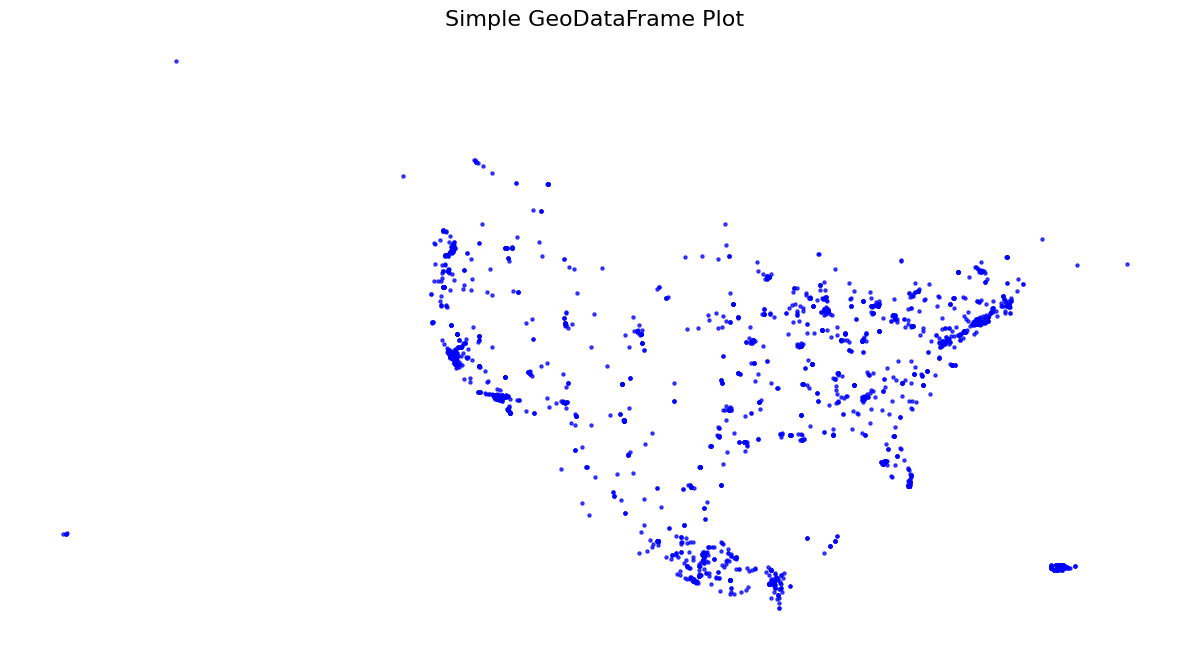

In [8]:
# Plot the GeoDataFrame
fig, ax = plt.subplots(figsize=(12, 8))

# Plot the boundaries
gdf.boundary.plot(ax=ax, color='black', linewidth=1)

# Plot the points
gdf.plot(ax=ax, marker='o', color='blue', markersize=5, alpha=0.7)

# Customize the plot
ax.set_title('Simple GeoDataFrame Plot', fontsize=16)
ax.set_axis_off()  # Remove axes

# Display the plot
plt.tight_layout()
plt.show()


**2. Geospatial Visualization (30 points)**

a) Create a base map with markers for each incident using Folium.

In [9]:

# Step 1: Create a base map
m = folium.Map(location=[0, 0], zoom_start=2) # Starting with world map centered at (0, 0)

# Step 2: Add markers for each incident (latitude and longitude should be in your GeoDataFrame)
for _, row in gdf.iterrows():
  folium.Marker([row['latitude'], row['longitude']],
  popup=f"Event ID: {row['eventid']}\nCountry: {row['country_txt']}\nDate: {row['iyear']}-{row['imonth']}-{row['iday']}",
  icon=folium.Icon(color='blue')).add_to(m)

# Display the map
m

# # Step 1: Create a base map centered on the mean coordinates of your data
# center_lat = gdf['latitude'].mean()
# center_lon = gdf['longitude'].mean()
# m = folium.Map(location=[center_lat, center_lon], zoom_start=3, control_scale=True)

# # Step 2: Create a MarkerCluster layer
# marker_cluster = MarkerCluster().add_to(m)

# # Step 3: Add markers for each incident with custom popups
# for _, row in gdf.iterrows():
#     folium.Marker(
#         location=[row['latitude'], row['longitude']],
#         popup=folium.Popup(f"""
#         <b>Event ID:</b> {row['eventid']}<br>
#         <b>Country:</b> {row['country_txt']}<br>
#         <b>Date:</b> {row['iyear']}-{row['imonth']}-{row['iday']}<br>
#         <b>Attack Type:</b> {row['attacktype1_txt']}<br>
#         <b>Killed:</b> {row['nkill']}<br>
#         <b>Wounded:</b> {row['nwound']}
#         """, max_width=300),
#         icon=folium.Icon(color='red', icon='info-sign')
#     ).add_to(marker_cluster)

# # Display the map
# m


b) Generate a choropleth map showing the number of incidents per country.

In [10]:

import requests

# Count the number of incidents per country
incident_counts = df_cleaned['country_txt'].value_counts().reset_index()
incident_counts.columns = ['country', 'incident_count']
incident_counts['country'] = incident_counts['country'].replace('United States', 'United States of America')
print(incident_counts)

# Online URL for world countries GeoJSON
geojson_url = "https://raw.githubusercontent.com/johan/world.geo.json/master/countries.geo.json"

# Fetch the GeoJSON data directly from the URL
response = requests.get(geojson_url)
world_geo = response.json()

# Initialize the choropleth map
choropleth_map = folium.Map(location=[20, 0], zoom_start=2)

# Create the Choropleth map
folium.Choropleth(
geo_data=world_geo,
name='choropleth',
data=incident_counts,
columns=['country', 'incident_count'],
key_on='feature.properties.name',
fill_color='YlGn',
fill_opacity=0.7,
line_opacity=0.2,
legend_name='Number of Incidents'
).add_to(choropleth_map)

# Display the map
display(choropleth_map)



# import folium
# from folium.plugins import MarkerCluster
# import branca.colormap as cm

# # Assuming df_cleaned and incident_counts are already prepared

# # Create a base map centered on the mean coordinates of your data
# center_lat = df_cleaned['latitude'].mean()
# center_lon = df_cleaned['longitude'].mean()
# m = folium.Map(location=[center_lat, center_lon], zoom_start=3, control_scale=True)

# # Create a custom colormap
# colormap = cm.LinearColormap(colors=['green', 'yellow', 'red'],
#                              vmin=incident_counts['incident_count'].min(),
#                              vmax=incident_counts['incident_count'].max())
# colormap.caption = 'Number of Incidents'
# m.add_child(colormap)

# # Create the Choropleth layer
# choropleth = folium.Choropleth(
#     geo_data=world_geo,
#     name='Incidents by Country',
#     data=incident_counts,
#     columns=['country', 'incident_count'],
#     key_on='feature.properties.name',
#     fill_color='YlOrRd',
#     fill_opacity=0.7,
#     line_opacity=0.2,
#     legend_name='Number of Incidents'
# ).add_to(m)

# # Add hover functionality to Choropleth
# choropleth.geojson.add_child(
#     folium.features.GeoJsonTooltip(['name'], labels=False)
# )

# # Create a MarkerCluster layer for individual incidents
# marker_cluster = MarkerCluster().add_to(m)

# # Add markers for each incident
# for _, row in df_cleaned.iterrows():
#     folium.Marker(
#         location=[row['latitude'], row['longitude']],
#         popup=folium.Popup(f"""
#         <b>Country:</b> {row['country_txt']}<br>
#         <b>Date:</b> {row['iyear']}-{row['imonth']}-{row['iday']}<br>
#         <b>Attack Type:</b> {row['attacktype1_txt']}<br>
#         <b>Killed:</b> {row['nkill']}<br>
#         <b>Wounded:</b> {row['nwound']}
#         """, max_width=300),
#         icon=folium.Icon(color='red', icon='info-sign')
#     ).add_to(marker_cluster)

# # Add layer control
# folium.LayerControl().add_to(m)

# # Display the map
# display(m)



                    country  incident_count
0  United States of America            3120
1                    Mexico             597
2                    Canada             124


c) Create a heatmap of incidents.

In [11]:
# Step 1: Prepare the data for the heatmap
heat_data = [[row['latitude'], row['longitude']] for _, row in gdf.iterrows()]

# Step 2: Create a base map
m_heatmap = folium.Map(location=[0, 0], zoom_start=2)

# Step 3: Add the heatmap to the map
HeatMap(heat_data).add_to(m_heatmap)

# Display the heatmap
m_heatmap


**3. Attack Type Analysis (20 points)**

a) Analyze and visualize the top 5 attack types using a pie chart (just to humor your teacher) and also using barcharts.

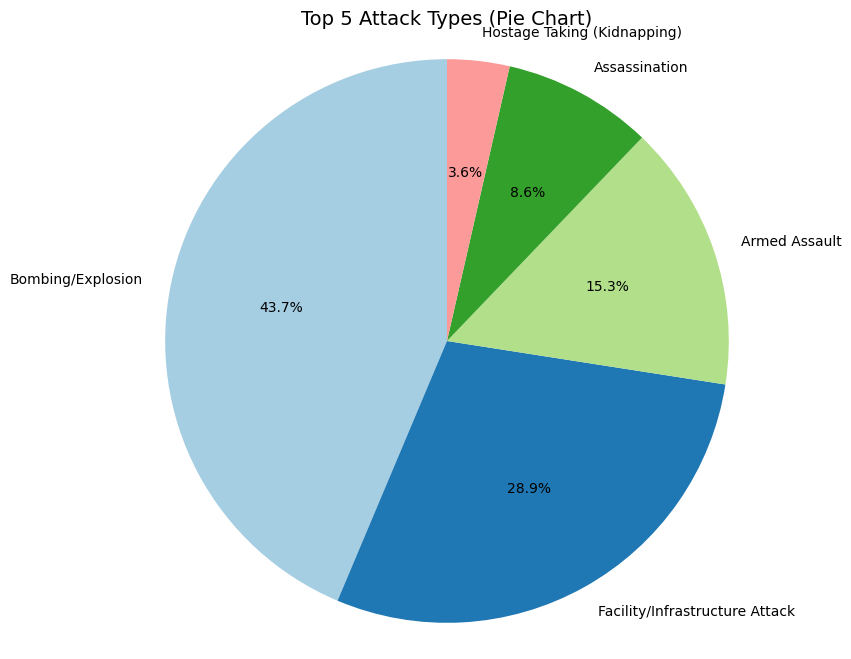

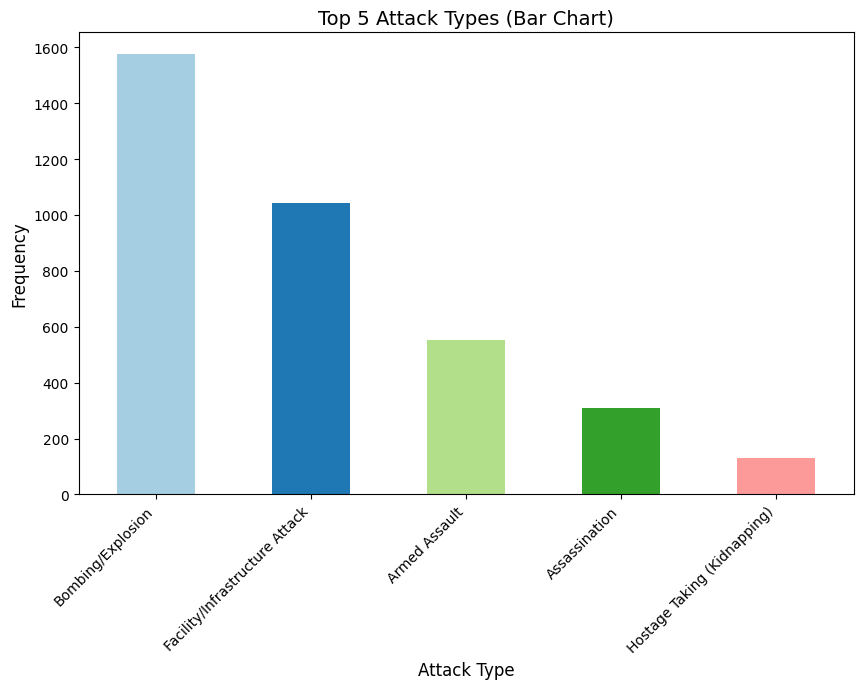

Frequency of Each Attack Type:
attacktype1_txt
Bombing/Explosion                      1575
Facility/Infrastructure Attack         1042
Armed Assault                           552
Assassination                           310
Hostage Taking (Kidnapping)             129
Unarmed Assault                         108
Hostage Taking (Barricade Incident)      72
Unknown                                  33
Hijacking                                20
Name: count, dtype: int64


In [12]:
# b) Analyze the top 5 attack types
attack_counts = df_cleaned['attacktype1_txt'].value_counts()

# Select the top 5 attack types
top_5_attack_types = attack_counts.head(5)

# c) Plot a Pie Chart for the top 5 attack types
plt.figure(figsize=(8, 8))
plt.pie(top_5_attack_types, labels=top_5_attack_types.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title('Top 5 Attack Types (Pie Chart)', fontsize=14)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

# d) Plot a Bar Chart for the top 5 attack types
plt.figure(figsize=(10, 6))
top_5_attack_types.plot(kind='bar', color=plt.cm.Paired.colors[:5])
plt.title('Top 5 Attack Types (Bar Chart)', fontsize=14)
plt.xlabel('Attack Type', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.show()


# Display the frequencies
print("Frequency of Each Attack Type:")
print(attack_counts)

**4. Time Series Analysis (30 points)**

a) Create a line plot showing the number of incidents per year.

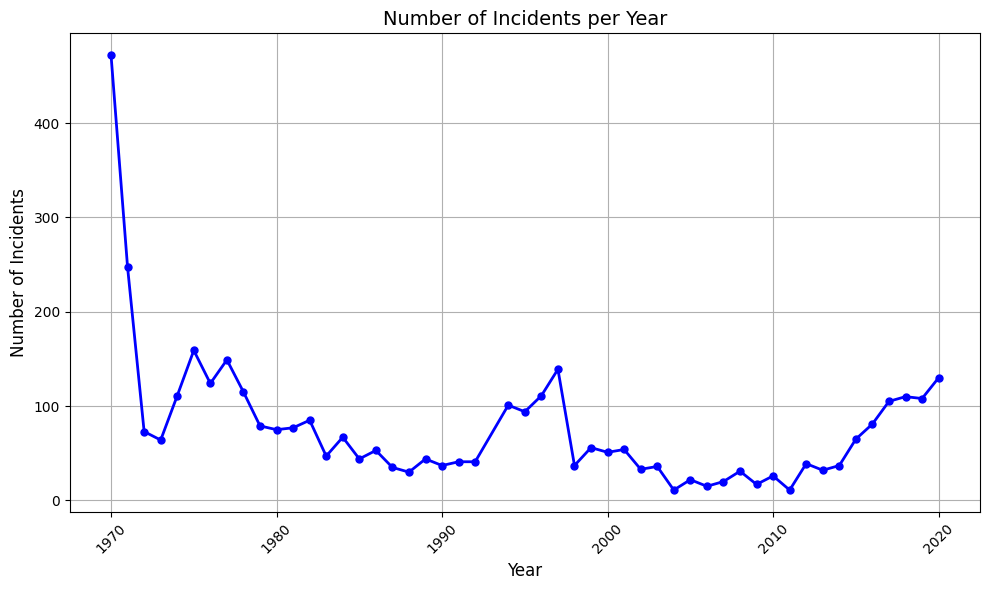

In [13]:
# b) Group by year and count the number of incidents per year
incidents_per_year = df_cleaned['iyear'].value_counts().sort_index()

# c) Create a line plot for the number of incidents per year
plt.figure(figsize=(10, 6))
plt.plot(incidents_per_year.index, incidents_per_year.values, marker='o', color='b', linestyle='-', linewidth=2, markersize=5)
plt.title('Number of Incidents per Year', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Incidents', fontsize=12)
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



b) Perform time series decomposition to analyze trend, seasonality, and residuals.

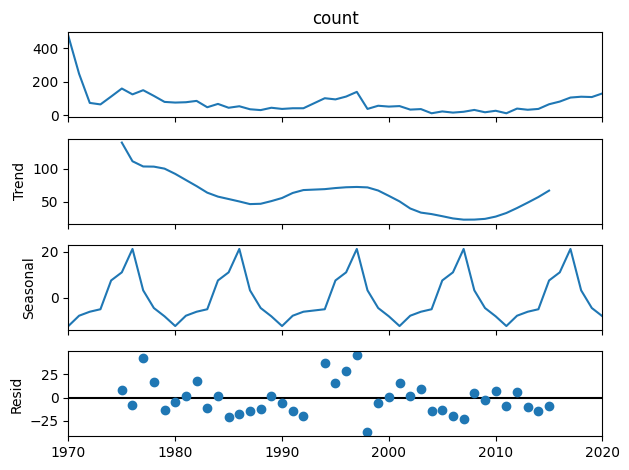

In [18]:

import statsmodels.api as sm

# Aggregate the number of incidents by year again to ensure it's a time series
ts_data = incidents_per_year

# Perform time series decomposition
decomposition = sm.tsa.seasonal_decompose(ts_data, model='additive', period=10)

# Plot the decomposition results
decomposition.plot()
plt.show()


# import pandas as pd
# import matplotlib.pyplot as plt
# from statsmodels.tsa.seasonal import seasonal_decompose

# # a) Load the dataset using pandas
# df = pd.read_csv('region_01.csv')

# # b) Group by year and count the number of incidents per year
# incidents_per_year = df['iyear'].value_counts().sort_index()

# # c) Create a time series object (as a pandas Series)
# incidents_ts = incidents_per_year

# # d) Perform time series decomposition
# decomposition = seasonal_decompose(incidents_ts, model='additive', period=10)  # 'period=1' for yearly data

# # e) Plot the decomposed components
# plt.figure(figsize=(12, 8))

# # Trend component
# plt.subplot(4, 1, 1)
# plt.plot(decomposition.trend)
# plt.title('Trend Component')

# # Seasonal component
# plt.subplot(4, 1, 2)
# plt.plot(decomposition.seasonal)
# plt.title('Seasonal Component')

# # Residual component
# plt.subplot(4, 1, 3)
# plt.plot(decomposition.resid)
# plt.title('Residual Component')

# # Original time series
# plt.subplot(4, 1, 4)
# plt.plot(incidents_ts)
# plt.title('Original Time Series')

# # Adjust layout to avoid overlapping
# plt.tight_layout()
# plt.show()



b) Perform time series decomposition to analyze trend, seasonality, and residuals.

c) Plot the decomposition results.

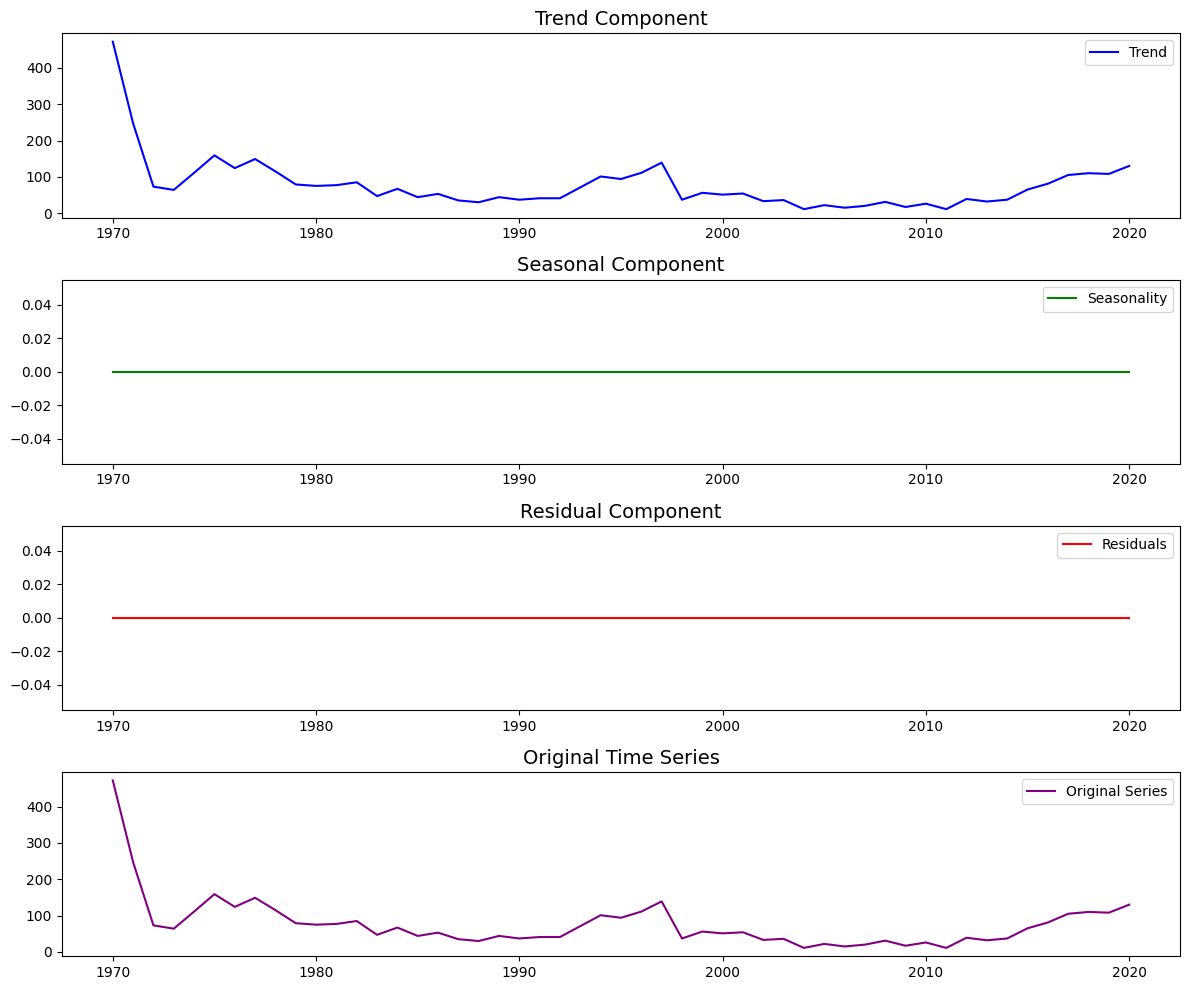

In [15]:
# b) Group by year and count the number of incidents per year
incidents_per_year = df_cleaned['iyear'].value_counts().sort_index()

# c) Create a time series object (as a pandas Series)
incidents_ts = incidents_per_year

# d) Perform time series decomposition
decomposition = seasonal_decompose(incidents_ts, model='additive', period=1)  # 'period=1' for yearly data

# e) Plot the decomposed components
plt.figure(figsize=(12, 10))

# Plotting the Trend component
plt.subplot(4, 1, 1)
plt.plot(decomposition.trend, label='Trend', color='blue')
plt.title('Trend Component', fontsize=14)
plt.legend()

# Plotting the Seasonal component
plt.subplot(4, 1, 2)
plt.plot(decomposition.seasonal, label='Seasonality', color='green')
plt.title('Seasonal Component', fontsize=14)
plt.legend()

# Plotting the Residual component
plt.subplot(4, 1, 3)
plt.plot(decomposition.resid, label='Residuals', color='red')
plt.title('Residual Component', fontsize=14)
plt.legend()

# Plotting the Original time series
plt.subplot(4, 1, 4)
plt.plot(incidents_ts, label='Original Series', color='purple')
plt.title('Original Time Series', fontsize=14)
plt.legend()

# Adjust layout to avoid overlap
plt.tight_layout()
plt.show()


d) Provide a brief interpretation of the decomposition results.

Interpretation of the Time Series Decomposition Results:
After performing the seasonal decomposition on the dataset, we obtained three components:

Trend Component:

What it shows: The trend represents the long-term progression of incidents over the years, showing whether the number of incidents is increasing, decreasing, or staying stable over time.
Interpretation: From the trend component, if the line is increasing, it indicates that the number of incidents has risen over time. If it's decreasing, it means that incidents have been decreasing in number. If the trend line is relatively flat, it means there is no significant long-term increase or decrease in the number of incidents.
For example, if we see an increasing trend, this might suggest that terrorism-related incidents have been more frequent in recent years, or it could indicate an upward trend due to global conflicts or specific political changes.
Seasonal Component:

What it shows: The seasonality component captures recurring fluctuations or periodic patterns that might happen at regular intervals (e.g., yearly, monthly). It could show patterns such as higher incidents during specific times of the year.
Interpretation: Since we are working with yearly data, strong seasonality may not be evident unless there is a clear cyclical pattern. In a case where seasonality is weak or absent, it may indicate that the frequency of incidents does not exhibit regular seasonal fluctuations, meaning incidents are more or less distributed randomly across the years.
If a seasonal pattern is observed, we might see peaks and troughs in certain periods. For example, if there's a higher frequency of incidents during specific years (e.g., during election cycles or war periods), this would appear as a seasonal fluctuation.
Residual Component:

What it shows: The residual component represents the noise or randomness left over after removing the trend and seasonal components from the data. It captures any irregular fluctuations that cannot be explained by trend or seasonality.
Interpretation: If the residual component shows large spikes or random movements, it indicates that there are irregular incidents that don't follow any clear pattern (trend or seasonality). Ideally, residuals should appear random and centered around zero, suggesting that the trend and seasonality have been effectively removed and the remaining noise is purely stochastic (random).
If there are clear patterns in the residual component, it might indicate that there are still unaccounted factors influencing the data (e.g., special events, political events, or global incidents that are irregular but influence terrorism activities).
Original Time Series:

The original time series plot shows the raw number of incidents per year. By comparing it with the decomposition components, we can visually assess how well the trend and seasonal components match the actual data. This gives us insights into whether the decomposition model is accurately capturing the main factors driving the variations in the data.
Example Interpretation Based on Expected Results:
If the Trend Component shows a noticeable increase over time, we could conclude that there has been an upward trajectory in the number of incidents, possibly due to geopolitical tensions, conflicts, or the rise in global terrorism.

If the Seasonal Component is flat or shows no clear pattern, it would suggest that the frequency of incidents doesn't depend on specific times of the year or any cyclical events.

If the Residual Component appears to be random (with no obvious pattern or large fluctuations), this would indicate that the trend and any seasonality (if applicable) have successfully captured the main structure of the data, and the remaining noise is random, not tied to any recurring pattern.

Finally, comparing the Original Time Series with the decomposed components will help us assess how well the decomposition method has separated out the trend, seasonality, and residuals.

In Conclusion:
Trend: Increasing, stable, or decreasing over time.
Seasonality: Might not be present in yearly data, but if it is, it will show regular fluctuations.
Residuals: Should ideally be random, with no pattern remaining after removing trend and seasonality.